I will use this notebook to demonstrate some calculations of photon emission properties from a nanofiber-trapped neutral atom system using MEEP and plotting in Julia.

In [ ]:
run(pipeline(`mpirun -n 6 meep-mpi "nanofiber.ctl"`, "nanofiber.out"))

# Local field evolution

This should be obtained by setting up a point-monitor at the dipole position and append time-dependent field components in some short periods. 
The data is stored in the `nanofiber-Ert.h5` file.
Now we plot out the time-dependent evolution of the field at the dipole position.

In [1]:
run(`h5ls nanofiber-Ert.h5`)

ex.i                     Dataset {1200/Inf}
ex.r                     Dataset {1200/Inf}
ey.i                     Dataset {1200/Inf}
ey.r                     Dataset {1200/Inf}
ez.i                     Dataset {1200/Inf}
ez.r                     Dataset {1200/Inf}


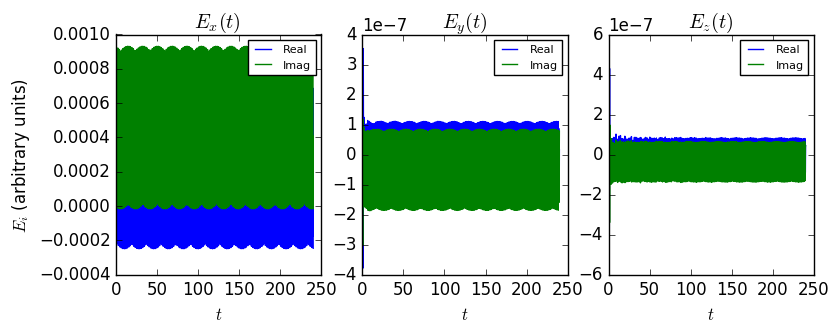

(1200,)


PyObject <matplotlib.legend.Legend object at 0x7f12cff267d0>

In [3]:
using PyPlot
using HDF5
ex = h5read("nanofiber-Ert.h5", "ex.r") + im*h5read("nanofiber-Ert.h5", "ex.i")
ey = h5read("nanofiber-Ert.h5", "ey.r") + im*h5read("nanofiber-Ert.h5", "ey.i")
ez = h5read("nanofiber-Ert.h5", "ez.r") + im*h5read("nanofiber-Ert.h5", "ez.i")
println(size(ex))
lent=length(ex)
t=linspace(0,240.0,lent)
figure(figsize=(9,3))
subplot(1,3,1)
ax=plot(t,real(ex))
plot(t,imag(ex))
title("\$E_x(t)\$ ")
xlabel(L"t")
ylabel(L"$E_i$ (arbitrary units)")
legend(["Real", "Imag"],fontsize=8)

subplot(1,3,2)
ax=plot(t,real(ey))
plot(t,imag(ey))
title("\$E_y(t)\$")
xlabel(L"t")
#ylabel(L"$E_y$ (arbitrary units)")
legend(["Real", "Imag"],fontsize=8)

subplot(1,3,3)
ax=plot(t,real(ez))
plot(t,imag(ez))
title("\$E_z(t)\$")
xlabel(L"t")
#ylabel(L"$E_z$ (arbitrary units)")
legend(["Real", "Imag"],fontsize=8)